# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [155]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files!
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [156]:
# Combine the data into a single dataset
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])



# Display the data table for preview
mouse_data_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [157]:

mouse_data_complete2 = mouse_data_complete.rename(columns={"Mouse ID":"mouse_id"})

# Checking the number of mice.
mice_count = mouse_data_complete2.mouse_id.nunique()
mice_count

249

In [158]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

#Creating a new dataframe to get mouseid where we have duplicated timepoints
xy=mouse_data_complete.loc[mouse_data_complete.duplicated(subset=['Mouse ID','Timepoint'])]

#finding the duplicate mice id number
xy['Mouse ID'].unique()



array(['g989'], dtype=object)

In [159]:
# Optional: Get all the data for the duplicate mouse ID. 

mdup=mouse_data_complete.loc[mouse_data_complete["Mouse ID"]=="g989",:]
mdup



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [160]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mdclean=mouse_data_complete2[mouse_data_complete2.mouse_id!="g989"]
mdclean

,mouse_id,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [161]:
# Checking the number of mice in the clean DataFrame.
mice_count2 = mdclean.mouse_id.nunique()
mice_count2

248

## Summary Statistics

In [162]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
MeanTumorVolume=mdclean.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
MedianTumorVolume=mdclean.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
TumorVolVar=mdclean.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
TumorVolstd=mdclean.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
TumorVolsem=mdclean.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

d={'Mean Tumor Volume':MeanTumorVolume,'Median Tumor Volume':MedianTumorVolume,'Tumor Volume Variance':TumorVolVar, 'Tumor Volume Std.Dev.':TumorVolstd,'Tumor Volume Std.Err.':TumorVolsem}
drugreg1=pd.DataFrame(data=d)
drugreg1


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume Std.Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [163]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

drugreg2=mouse_data_complete[['Drug Regimen','Tumor Volume (mm3)']]

# Using the aggregation method, produce the same summary statistics in a single line.
agg_list = {
    'Tumor Volume (mm3)':
    ['mean', 'median', 'var', 'std', 'sem']
}
  
drugreg2.groupby(['Drug Regimen']).agg(agg_list)


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

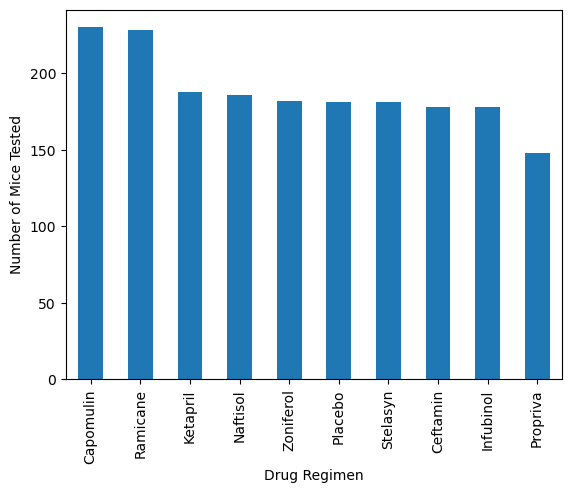

In [164]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regnamepanda = mdclean.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False).plot.bar(ylabel="Number of Mice Tested")




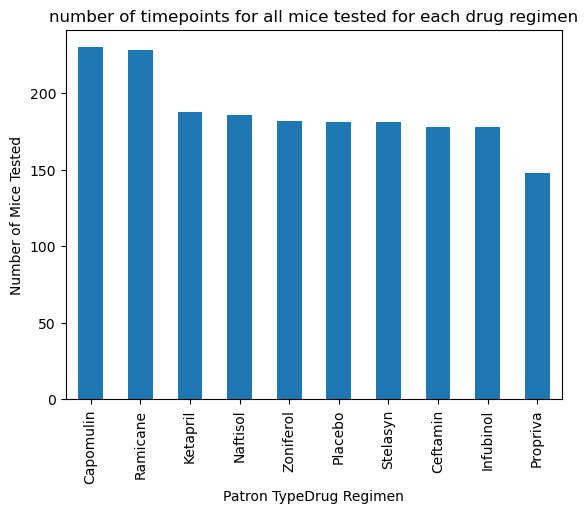

<Figure size 640x480 with 0 Axes>

In [165]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
regname = mdclean.groupby('Drug Regimen')

regtimepoint = regname['Timepoint'].count().sort_values(ascending=False)

patron_chart = regtimepoint.plot(kind="bar", title="number of timepoints for all mice tested for each drug regimen")
patron_chart.set_xlabel("Patron TypeDrug Regimen")
patron_chart.set_ylabel("Number of Mice Tested")

plt.show()
plt.tight_layout()


array([<AxesSubplot:ylabel='Sex'>], dtype=object)

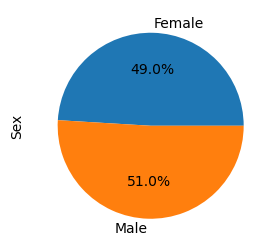

In [166]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mdclean.groupby('Sex')['mouse_id'].count().plot.pie(subplots=True,figsize=(3, 6),autopct="%1.1f%%",ylabel="Sex")



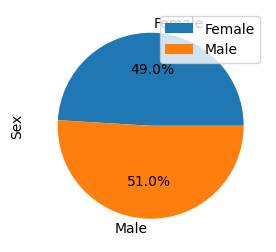

In [167]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

cd=mdclean.groupby('Sex')[['mouse_id']].count().plot.pie(subplots=True,figsize=(3, 6),autopct="%1.1f%%",ylabel="Sex")


## Quartiles, Outliers and Boxplots

In [168]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


tmlpreg=mdclean[['mouse_id','Drug Regimen','Timepoint','Tumor Volume (mm3)']]
li = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tml1=tmlpreg[tmlpreg['Drug Regimen'].isin(li)]
tmlfin=tml1.drop_duplicates(subset=['mouse_id','Drug Regimen'], keep='last')
tmlfin




,mouse_id,Drug Regimen,Timepoint,Tumor Volume (mm3)
9,k403,Ramicane,45,22.050126
19,s185,Capomulin,45,23.343598
29,x401,Capomulin,45,28.484033
39,m601,Capomulin,45,28.430964
49,g791,Ramicane,45,29.128472
...,...,...,...,...
1797,x822,Ceftamin,45,61.386660
1813,y163,Infubinol,45,67.685569
1845,y769,Ceftamin,45,68.594745
1855,y865,Ceftamin,45,64.729837


In [169]:
# Put treatments into a list for for loop (and later for plot labels)
regli=tmlfin['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
xt=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
      # Determine outliers using upper and lower bounds
    
for x in regli:
    volume = tmlfin.loc[tmlfin["Drug Regimen"]==x,'Tumor Volume (mm3)']
    xt.append(volume)
        
    Q1 = volume.quantile(0.25)
    Q2 = volume.quantile(0.5)
    Q3 = volume.quantile(0.75)
    IQR=Q3-Q1
    LBOUND=Q3-(1.5*IQR)
    UBOUND=Q1+(1.5*IQR)
    
    OUTLIERS = volume.loc[(volume<LBOUND)|(volume>UBOUND)]
   
    print(f'The IQR for {x} is {IQR}')
    print(f'Upper bound = {UBOUND}  and lower = {LBOUND}')
    print(f'Outliers for {x} : {OUTLIERS}')
    print(f'See tumor volume for {x} treatment below: ')
    print(volume)
    

    

The IQR for Ramicane is 9.098536719999998
Upper bound = 45.20827463  and lower = 27.01120119
Outliers for Ramicane : 9      22.050126
420    45.220869
Name: Tumor Volume (mm3), dtype: float64
See tumor volume for Ramicane treatment below: 
9      22.050126
49     29.128472
59     30.276232
74     30.564625
84     30.638696
94     31.560470
114    31.095335
154    33.397653
174    32.978522
184    33.562402
194    36.134852
214    38.810366
234    37.225650
254    36.374510
262    36.561652
272    37.311236
289    38.342008
327    38.407618
400    40.659006
410    40.667713
420    45.220869
430    43.047543
447    43.419381
449    43.166373
453    44.183451
Name: Tumor Volume (mm3), dtype: float64
The IQR for Capomulin is 7.781863460000004
Upper bound = 44.05015203000001  and lower = 28.486425109999995
Outliers for Capomulin : 19      23.343598
29      28.484033
39      28.430964
440     47.685963
1455    46.539206
Name: Tumor Volume (mm3), dtype: float64
See tumor volume for Capomulin 

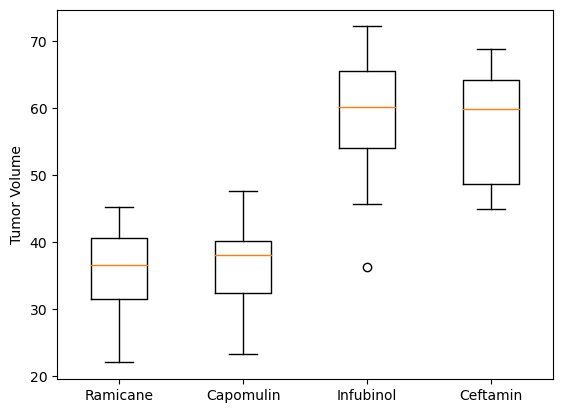

In [170]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(xt,labels=regli)
plt.ylabel("Tumor Volume")
plt.show()


## Line and Scatter Plots

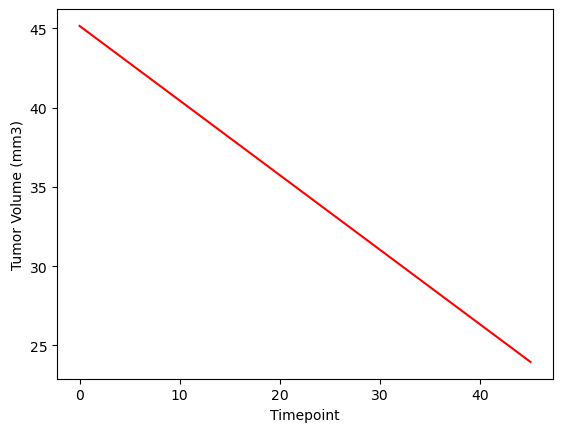

In [171]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

from scipy.stats import linregress

capomulinmouse= mdclean.loc[mdclean["Drug Regimen"]=="Capomulin"]
capomulinmouse1=capmoulinmouse.loc[capmoulinmouse["mouse_id"]=="s185"]
capomulinmouse1

x_values = capomulinmouse1['Timepoint']
y_values = capomulinmouse1['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,40),fontsize=15,color="red")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

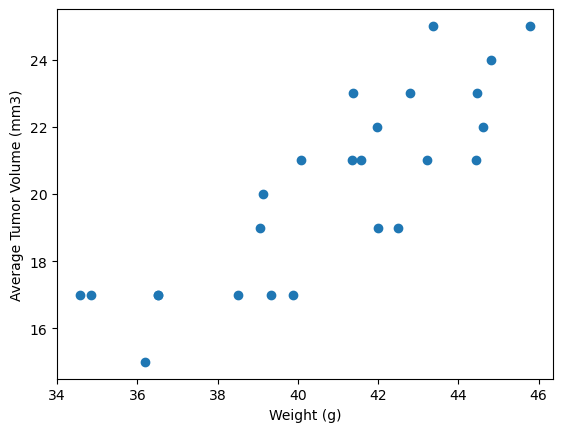

In [172]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin2=capomulinmouse.groupby(["mouse_id"]).mean()

capomulin2

x_values = capomulin2['Tumor Volume (mm3)']
y_values = capomulin2['Weight (g)']

plt.scatter(x_values,y_values)

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708723


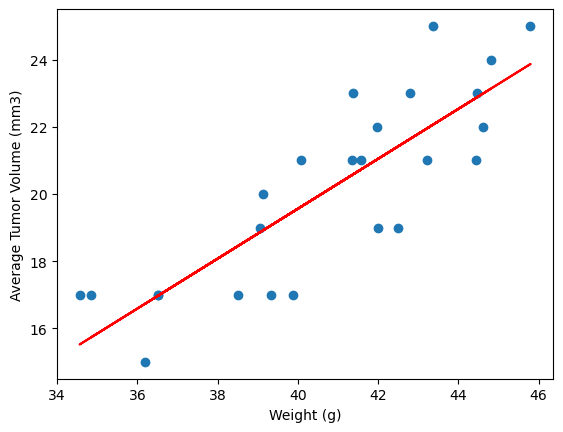

In [173]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


x_values = capomulin2['Tumor Volume (mm3)']
y_values = capomulin2['Weight (g)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,40),fontsize=15,color="red")


plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

